In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.layers import Input,Dense
from keras.models import Model #It's not Sequential this not but it is Functional This time


input_img = Input(shape=(784,)) #Input layer Image ko bhi flatten kar diya hai yaha humne
encoded = Dense(32, activation = 'sigmoid')(input_img) #)(input_img) <== This thing is the input given
decoded = Dense(784,activation = 'sigmoid')(encoded)


autoencoder = Model( input_img, decoded) 

Using TensorFlow backend.


In [3]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [4]:
from keras.datasets import mnist
mnist.load_data()

(x_train, _),(x_test, _)= mnist.load_data()

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print(x_test.shape)
print(x_test.shape)
#x_train = x_train.reshape()

(10000, 28, 28)
(10000, 28, 28)


In [6]:
x_train = x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train,x_train,
               epochs= 20,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.4702 - val_loss: 0.3318
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.3057 - val_loss: 0.2902
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2839 - val_loss: 0.2790
Epoch 4/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2764 - val_loss: 0.2740
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2727 - val_loss: 0.2713
Epoch 6/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2706 - val_loss: 0.2695
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2691 - val_loss: 0.2683
Epoch 8/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.2681 - val_loss: 0.2675
Epoch 9/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.2674 - val_loss: 0.2668
Epoch

In [8]:
encoder = Model(input_img,encoded)

In [9]:
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

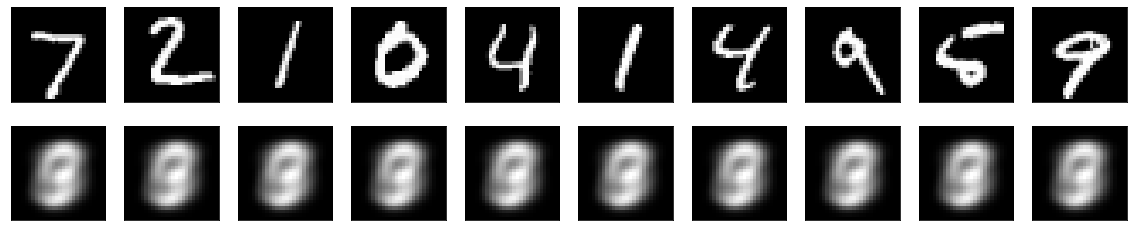

In [11]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep Autoencoder

In [17]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [18]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.3489 - val_loss: 0.2626
Epoch 2/100
43264/60000 [====================>.........] - ETA: 1s - loss: 0.2578

KeyboardInterrupt: 

In [27]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [20]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [22]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
                )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2090 - val_loss: 0.1693
Epoch 2/50
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1528 - val_loss: 0.1406
Epoch 3/50
60000/60000 [==============================] - 99s 2ms/step - loss: 0.1395 - val_loss: 0.1326
Epoch 4/50
 2048/60000 [>.............................] - ETA: 1:36 - loss: 0.1335

KeyboardInterrupt: 

# DeNoising Images

In [12]:
from keras.datasets import mnist
mnist.load_data()

(x_train, _),(x_test, _)= mnist.load_data()

In [13]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print(x_test.shape)
print(x_test.shape)
#x_train = x_train.reshape()

(10000, 28, 28)
(10000, 28, 28)


In [15]:
x_train = x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [22]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, #mean
                                                         scale = 1.0, #Std. Dev.
                                                         size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, #mean
                                                         scale = 1.0, #Std. Dev.
                                                         size = x_test.shape)


In [23]:
x_train_noisy= np.clip(x_train_noisy,0.,1.)
x_test_noisy= np.clip(x_test_noisy,0.,1.)

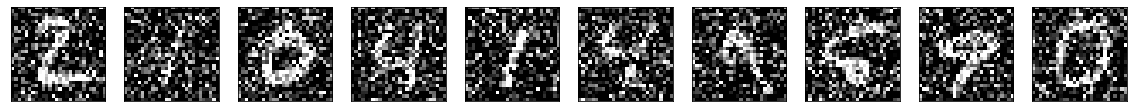

In [26]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [30]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [32]:

input_img =Input(shape=(28,28,1))

x = Conv2D(32,(3,3),activation = 'relu',padding="same")(input_img)
#(28,28,32)

x = MaxPooling2D((2,2),padding="same")(x)
#( 14, 14, 32)
x = Conv2D(32,(3,3),activation ="relu",padding="same")(x)
#(14,14,32)
encoded = MaxPooling2D((2,2),padding="same")(x)
#(7,7,32)

x = Conv2D(32,(3,3),activation="relu",padding="same")(encoded)
#(7,7,32)
x = UpSampling2D((2,2))(x)
#(14,14,32)
x = Conv2D(32,(3,3),activation="relu",padding="same")(x)
#(14,14,32)
x = UpSampling2D((2,2))(x)
#(28,28,32)
decoded = Conv2D(1,(3,3), activation = "sigmoid",padding="same")(x) # we can also use relu as activation here

autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer="adadelta",loss="binary_crossentropy")

In [33]:
autoencoder.fit(x_train_noisy,x_train,
               epochs=1,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test_noisy,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 176s 3ms/step - loss: 0.1740 - val_loss: 0.1196


In [49]:
de_noised_images = autoencoder.predict(x_test_noisy[:10])
de_noised_images.shape

(10, 28, 28, 1)

ValueError: num must be 1 <= num <= 18, not 19

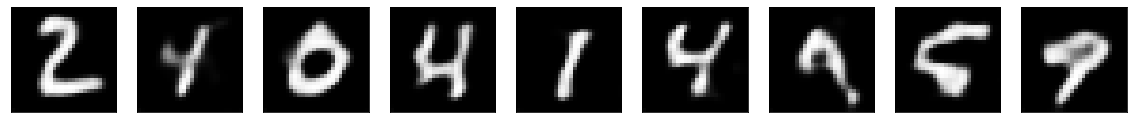

In [52]:
n = 9  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(1, n, i )
    plt.imshow(de_noised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()